In [292]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

Loading the Data

In [293]:
dtest = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [294]:
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Understanding the Data


In [295]:
df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [296]:
df.groupby(['Sex'],as_index=False)['Survived'].mean()



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [297]:
df.groupby(['SibSp'],as_index=False)['Survived'].mean()


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [298]:
df.groupby(['Parch'],as_index=False)['Survived'].mean()


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [299]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1
# df.groupby(['FamilySize'],as_index=False)['Survived'].mean()
dtest['FamilySize'] = dtest['SibSp'] + dtest['Parch'] +1

Handling Data, Missing Values, Normalizing, Scaling

In [300]:
df.info()
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [301]:
null_values = df.isnull().sum()
null_values

null_values = dtest.isnull().sum()
null_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [302]:
total_cells = np.product(df.shape)
total_missing = null_values.sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of total data",percent_missing)

percentage_null_age = (df['Age'].isnull().sum()/df['Age'].shape[0]) *100
percentage_null_cabin = (df['Cabin'].isnull().sum()/df['Cabin'].shape[0]) *100

#df['Fare']=df['Fare'].fillna(method='bfill', axis=0).fillna(0)

print("Percentage Age: %",percentage_null_age,"Percentage Cabin: %",percentage_null_cabin)


Percentage of total data 3.5742035742035743
Percentage Age: % 19.865319865319865 Percentage Cabin: % 77.10437710437711


- 8% of the data is missing, this is few data
- 19% of the Age data is missing, which for this I will use the average age
- 77% of the cabin data is missing, which for this I will probably drop the column due to >50% of data is missing

## Data Dropping
- In theory, port of embarcation. b/c this variables will not influence the outcome
- IDK if Sibs/Parch is relevant in this case.
- Passanger ID doesnt tells me anything about data

In [303]:
df.drop('Embarked', axis= 1, inplace=True)
# df.drop('Name', axis= 1, inplace=True)
# df.drop('PassengerId', axis= 1, inplace=True)

dtest.drop('Embarked', axis= 1, inplace=True)
# dtest.drop('Name', axis= 1, inplace=True)
# dtest.drop('PassengerId', axis= 1, inplace=True)

In [304]:
# df.Name.unique()

names = df['Name'].str.split(',', expand=True)
titles = names[1].str.split('.',expand=True)[0]
titles.unique()

names = dtest['Name'].str.split(',', expand=True)
titles = names[1].str.split('.',expand=True)[0]
titles.unique()



array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [305]:
#Only Considering TItles
df['Name'] = df['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]
df.head()

dtest['Name'] = dtest['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]


In [306]:
dtest.info()

dtest['Fare'].fillna(dtest['Fare'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [307]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.dropna(axis=1)

dtest['Age'].fillna(dtest['Age'].mean(), inplace=True)
dtest = dtest.dropna(axis=1)

dtest.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [308]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


Converting Categorical Variables into Numerical


In [309]:
#Sex is a binary (Male/Female)

OE=OrdinalEncoder()

# data = df([['Sex']])

sex_data = np.array(df['Sex']).reshape(-1,1)
encoded = OE.fit_transform(sex_data)
df['Sex'] = encoded

sex_datatest = np.array(dtest['Sex']).reshape(-1,1)
encoded = OE.fit_transform(sex_datatest)
dtest['Sex'] = encoded


name_data = np.array(df['Name']).reshape(-1,1)
encoded = OE.fit_transform(name_data)
df['Name'] = encoded

name_datatest = np.array(dtest['Name']).reshape(-1,1)
encoded = OE.fit_transform(name_datatest)
dtest['Name'] = encoded



In [310]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  FamilySize   891 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize
0,1,0,3,11.0,1.0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,12.0,0.0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,8.0,0.0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,12.0,0.0,35.0,1,0,113803,53.1000,2
4,5,0,3,11.0,1.0,35.0,0,0,373450,8.0500,1


In [311]:
df.Ticket.unique()


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [312]:
#due to all tickets being unique values, there will be no relation between the ticket number and anything. So it will also be discarded
df.drop('Ticket', axis= 1, inplace=True)


dtest.drop('Ticket', axis= 1, inplace=True)
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    float64
 3   Sex          418 non-null    float64
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   FamilySize   418 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


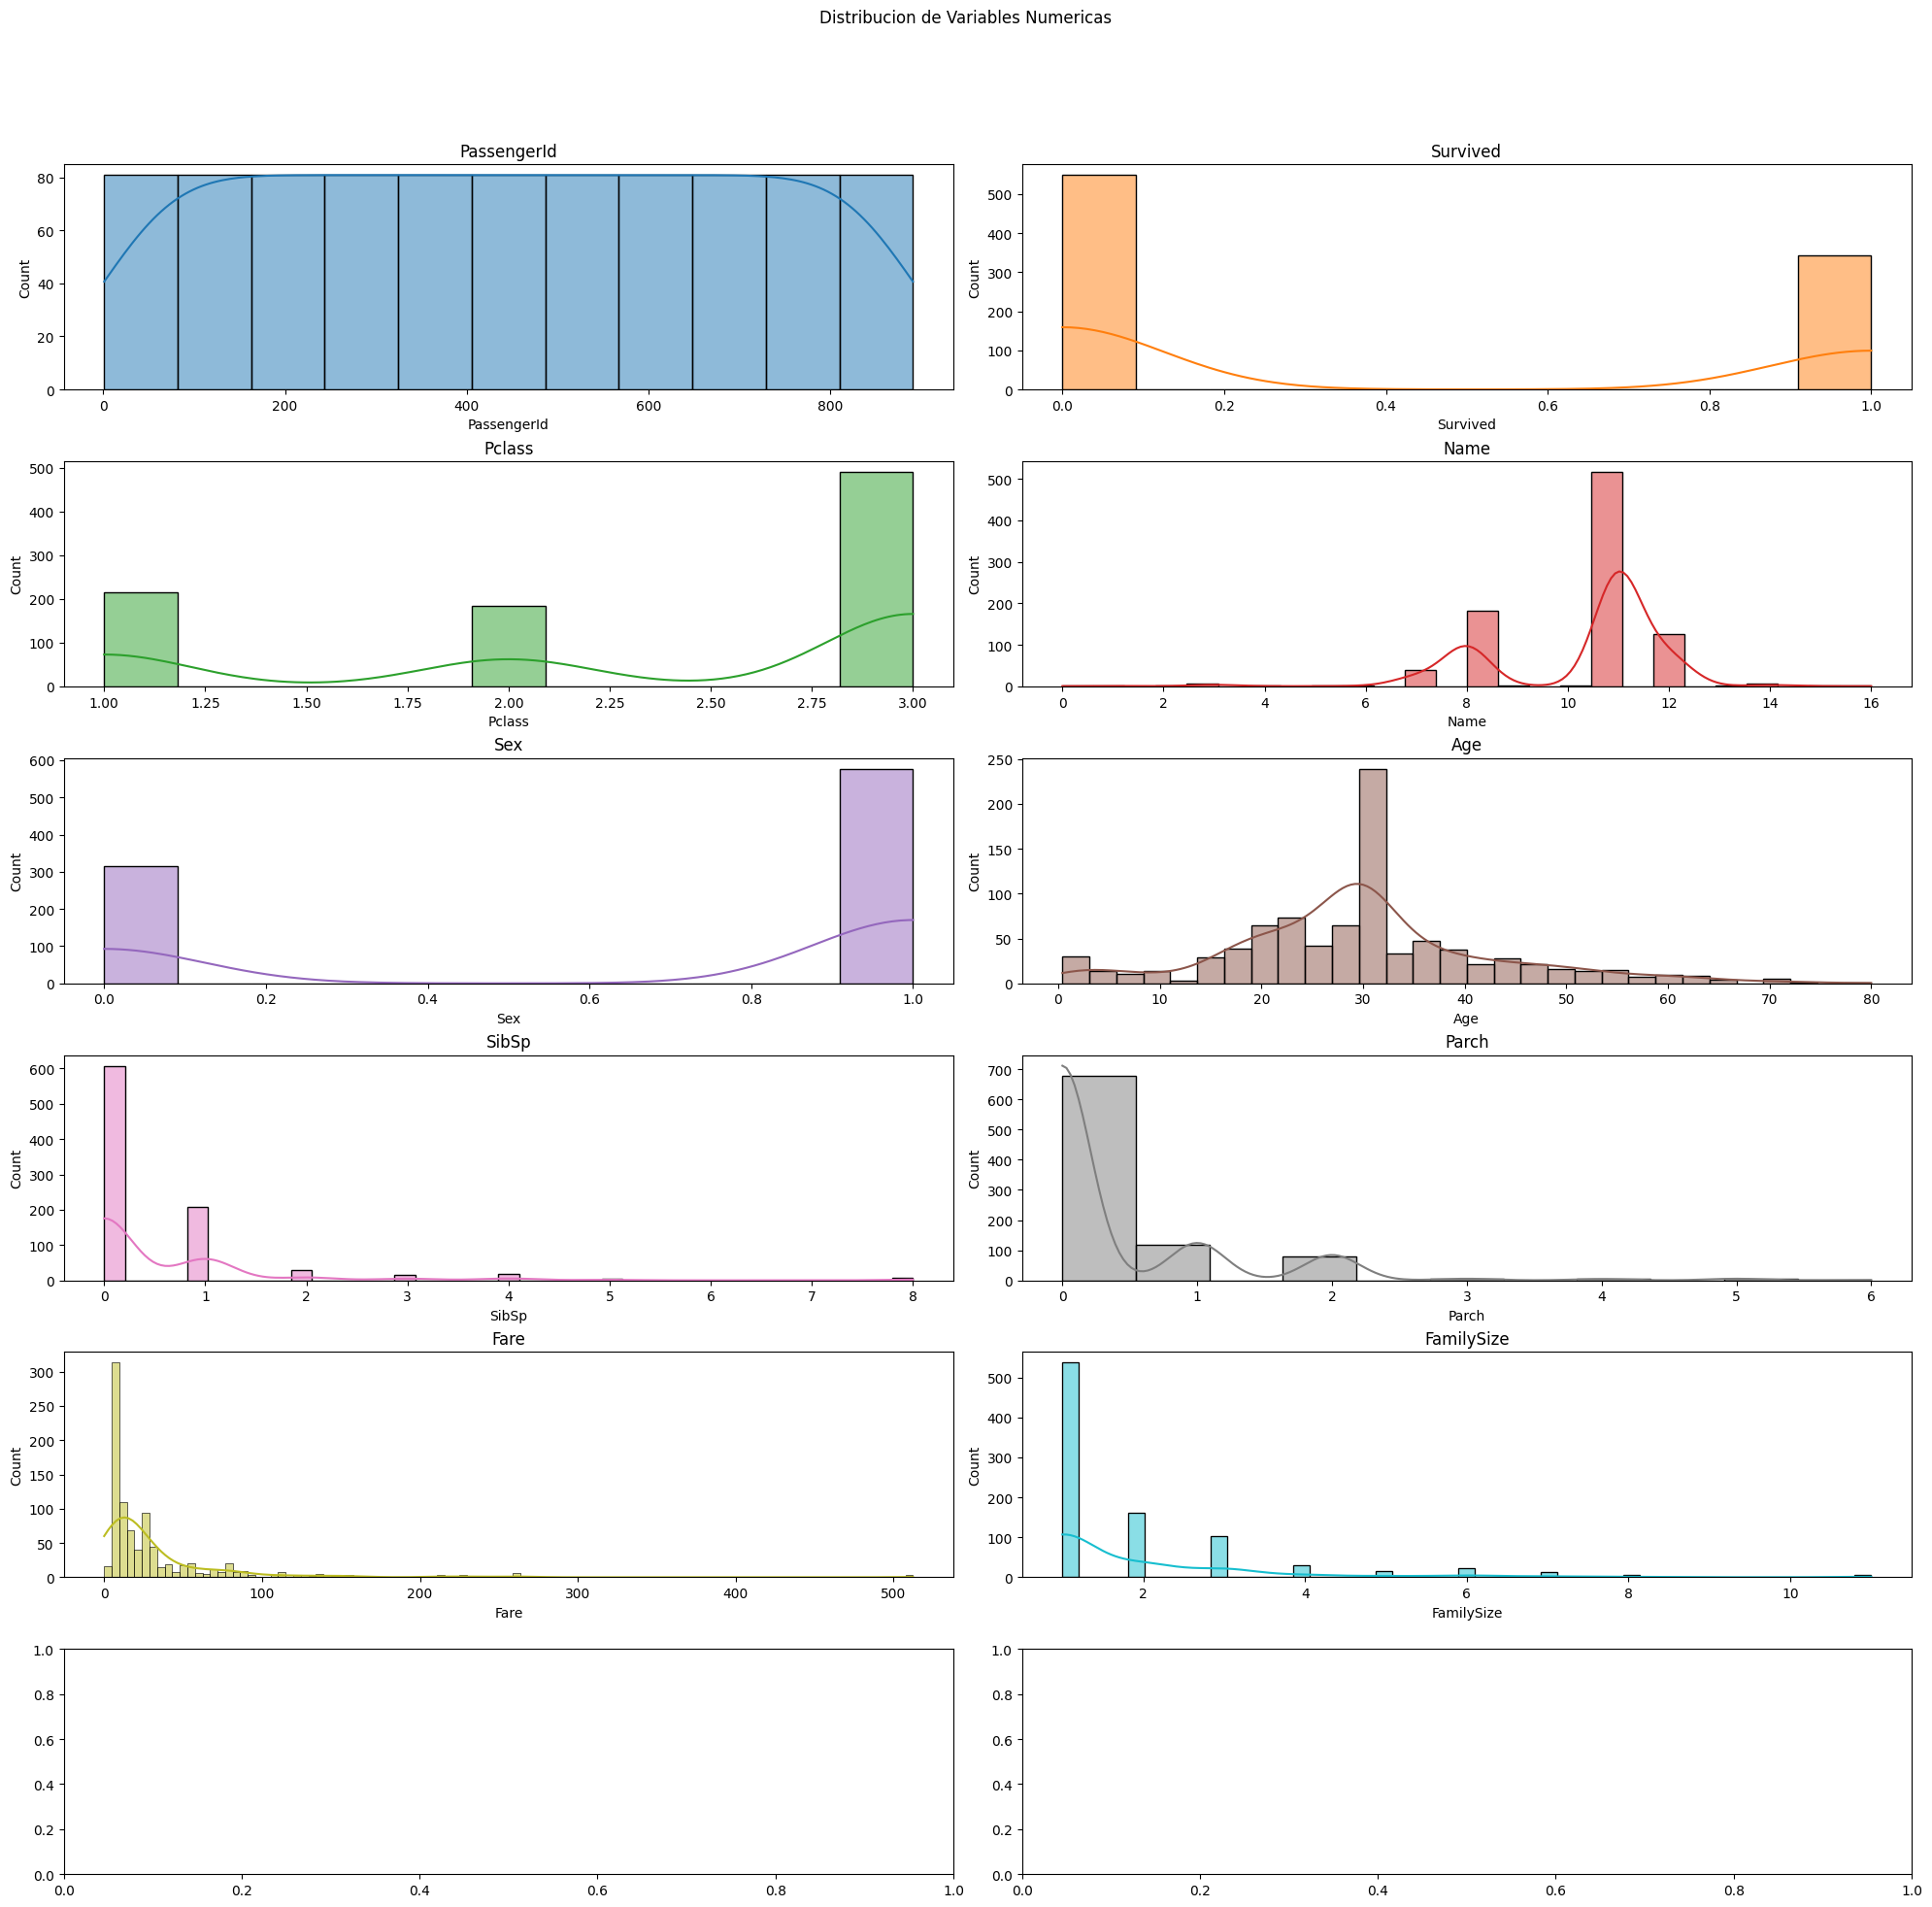

In [313]:
#Now all variables are numerical
##Estadistica Univariada
##Histogramas de frecuencia para variables numericas
fig, ax = plt.subplots(6,2, figsize = (20,20))
ax = ax.flat
num_col = df.select_dtypes(include=['int64','float64','int32']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = df, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'],ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Distribucion de Variables Numericas')
plt.show()

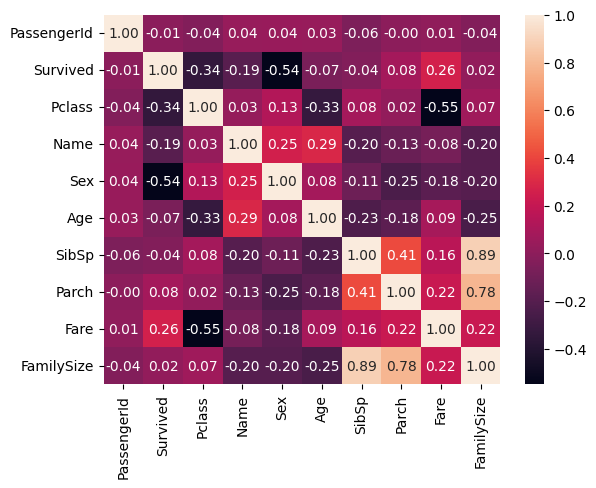

In [314]:
sb.heatmap(data = df.corr(numeric_only= True), annot=True, fmt = '0.2f')
plt.show()

In [315]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    float64
 3   Sex          418 non-null    float64
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   FamilySize   418 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


# LOGISTIC REGRESSION
Declare Feature Vector And Target Variable


In [316]:
# rspst = dtest[['Survived']].copy()

X = df.drop(['Survived'], axis=1)

y = df['Survived']


Split data into separate training and test set

In [317]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)


Feature Scaling

In [318]:
cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.490426,0.638577,0.689139,0.644195,0.425993,0.075843,0.095880,0.068410,0.108614
std,0.300820,0.422010,0.118164,0.479656,0.188073,0.168911,0.178817,0.100737,0.192238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217241,0.000000,0.733333,0.000000,0.322083,0.000000,0.000000,0.015440,0.000000
50%,0.483908,1.000000,0.733333,1.000000,0.418709,0.000000,0.000000,0.031425,0.000000
75%,0.764368,1.000000,0.733333,1.000000,0.509592,0.125000,0.200000,0.067096,0.150000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model Training

In [319]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Predict Results

In [320]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

Check Accuarcy score

In [321]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7853


In [322]:
#Prediction
y_pred_test_1 = logreg.predict(dtest)
y_pred_test_1

c:\Users\rafaa\Desktop\Data\virtual\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
submission = pd.DataFrame({
        "PassengerId": dtest["PassengerId"],
        "Survived": y_pred_test_1
    })

submission.to_csv('gender_submission.csv', index=False)

In [324]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
